In [183]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.5.1


In [184]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [185]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [186]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y})
circles.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [187]:
circles.y.value_counts()

y
1    500
0    500
Name: count, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]], device='mps:0'),
 tensor([1., 1., 1., 1., 0.], device='mps:0'))

In [190]:
# import matplotlib.pyplot as plt

# plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [193]:
X_train.device

device(type='mps', index=0)

In [194]:
from helper_functions import accuracy_fn

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=2, out_features=4)
        self.linear_2 = nn.Linear(in_features=4, out_features=1)

    def forward(self, X):
        return self.linear_2(self.linear_1(X))

model_v0 = CircleModelV0()
model_v0.to(device)
print(f' Model on device: {next(model_v0.parameters()).device}')

# loss_fn = nn.L1Loss()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_v0.parameters(), lr=0.01)

epochs = 2

for epoch in range(epochs):
    model_v0.train()
    y_train_pred = model_v0(X_train)
    y_train_logits = y_train_pred.squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_train_logits))
    train_loss = loss_fn(y_train_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # test
    model_v0.eval()
    with torch.inference_mode():
        y_test_pred = model_v0(X_test)
        y_test_logits = y_test_pred.squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_pred, y_test)
        test_acc = accuracy_fn(y_test, y_test_pred)
    print(f'Epoch: {epoch} | train_loss: {train_loss} | test_loss: {test_loss} | test_acc: {test_acc}')

 Model on device: mps:0
Epoch: 0 | train_loss: 0.7513746619224548 | test_loss: 0.7558020949363708 | test_acc: 49.0
Epoch: 1 | train_loss: 0.7513746619224548 | test_loss: 0.7558020949363708 | test_acc: 49.0


In [195]:
y_test_pred

tensor([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 1.], device='mps:0')

In [196]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


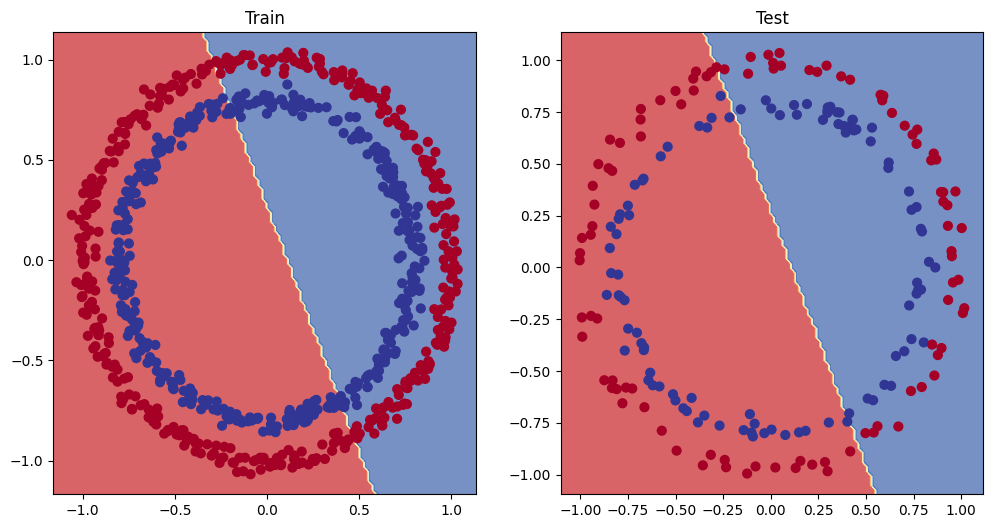

In [197]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_v0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_v0, X_test, y_test)

In [203]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, X):
        X = self.layer_1(X)
        X = self.layer_2(X)
        X = self.layer_3(X)
        X = self.relu(X)
        return X

model_v2 = CircleModelV2()
print(f'Current device: {device}')
model_v2.to(device)
print(f'Model on device: {next(model_v2.parameters()).device}')

model_v2

Current device: mps
Model on device: mps:0


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [200]:
from helper_functions import accuracy_fn

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.01)

accuracy_fn, loss_fn, optimizer

(<function helper_functions.accuracy_fn(y_true, y_pred)>,
 BCEWithLogitsLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [202]:
epochs = 10
for epoch in range(epochs):
    model_v2.train()
    y_train_logits = model_v2(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_train_logits))
    train_loss = loss_fn(y_train_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_acc = accuracy_fn(y_train, y_train_pred)

    model_v2.eval()
    with torch.inference_mode():
        y_test_logits = model_v2(X_test).squeeze()
        y_test_logits = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_logits, y_test)
        test_acc = accuracy_fn(y_test, y_test_pred)
    print(f'Epoch: {epoch} | Training Loss: {train_loss} | Training Accuracy: {train_acc} | Testing Loss: {test_loss} | Testing Accuracy: {test_acc}')
        

Epoch: 0 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 1 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 2 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 3 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 4 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 5 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 6 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Loss: 0.8132617473602295 | Testing Accuracy: 49.0
Epoch: 7 | Training Loss: 0.8132617473602295 | Training Accuracy: 50.0 | Testing Lo